## Importamos librerias y la data

In [1]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_excel('E-commerce_train.xlsx')

In [2]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Vamos a renombrar las columnas para que sean más fáciles de entender

data.columns = ['ID', 'Almacen', 'Medio_Transporte', 'Llamadas_Atencion', 'Puntaje_Cliente', 'Costo', 
                'Compras_Previas', 'Nivel_Importancia', 'Genero_Cliente', 'Descuento', 'Peso', 'Tiempo_Exacto']

In [4]:
data.head()

,ID,Almacen,Medio_Transporte,Llamadas_Atencion,Puntaje_Cliente,Costo,Compras_Previas,Nivel_Importancia,Genero_Cliente,Descuento,Peso,Tiempo_Exacto
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Hacemos un análisis exploratorio de la data

In [5]:
# Establecer como index la columna ID

data.set_index('ID', inplace=True)

In [6]:
# Evaluamos que datos tienen cada columna

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Almacen            8999 non-null   object
 1   Medio_Transporte   8999 non-null   object
 2   Llamadas_Atencion  8999 non-null   int64 
 3   Puntaje_Cliente    8999 non-null   int64 
 4   Costo              8999 non-null   int64 
 5   Compras_Previas    8999 non-null   int64 
 6   Nivel_Importancia  8999 non-null   object
 7   Genero_Cliente     8999 non-null   object
 8   Descuento          8999 non-null   int64 
 9   Peso               8999 non-null   int64 
 10  Tiempo_Exacto      8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 703.0+ KB


In [7]:
# Que valores tiene la columna Almacen
data.Almacen.unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [8]:
# Que valores tiene la columna Medio_Transporte
data.Medio_Transporte.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [9]:
# Que valores tiene la columna Llamadas_Atencion 
data.Llamadas_Atencion.unique()

array([4, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
# Que valores tiene la columna Puntaje_Cliente 
data.Puntaje_Cliente.unique()

array([2, 5, 3, 1, 4], dtype=int64)

In [11]:
# Que valores tiene la columna Costo 
data.Costo.unique()

array([177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198,
       275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234,
       266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169,
       160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261,
       202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185,
       278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168,
       265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237,
       264, 248, 191, 146, 135,  98,  97, 114, 112, 274, 166, 148, 270,
       242, 192, 116, 255, 209, 134, 130, 133, 140, 136, 142, 154, 155,
       127, 129, 159, 294, 226, 258, 241, 208, 182, 115, 212, 171, 249,
       243, 163, 272, 138, 273, 279, 173, 194, 262, 201, 260, 188, 267,
       131, 122, 103, 199, 236, 167, 259, 178, 123, 124,  96, 244, 254,
       128, 204, 245, 228, 268, 108, 276, 214, 281, 253, 104, 240, 121,
       153, 111, 117, 195, 110, 119, 196, 291, 118, 283, 100, 25

In [12]:
# Que valores tiene la columna Compras_Previas
data.Compras_Previas.unique()

array([ 3,  2,  4,  6,  5,  7, 10,  8], dtype=int64)

In [13]:
# Que valores tiene la columna Nivel_Importancia
data.Nivel_Importancia.unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
# Que valores tiene la columna Genero_Cliente
data.Genero_Cliente.unique()

array(['F', 'M'], dtype=object)

In [15]:
# Que valores tiene la columna Descuento
data.Descuento.unique()

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30],
      dtype=int64)

In [16]:
# Que valores tiene la columna Peso
data.Peso.unique()

array([1233, 3088, 3374, ..., 4748, 4368, 5648], dtype=int64)

In [17]:
# Que valores tiene la columna Tiempo_Exacto
data.Tiempo_Exacto.unique()

array([1, 0], dtype=int64)

In [18]:
# Las columnas tienen valores nulos o vacios

print('La columna Almacen tiene', data.Almacen.isnull().sum(), 'valores nulos')
print('La columna Medio_Transporte tiene', data.Medio_Transporte.isnull().sum(), 'valores nulos')
print('La columna Llamadas_Atencion tiene', data.Llamadas_Atencion.isnull().sum(), 'valores nulos')
print('La columna Puntaje_Cliente tiene', data.Puntaje_Cliente.isnull().sum(), 'valores nulos')
print('La columna Costo tiene', data.Costo.isnull().sum(), 'valores nulos')
print('La columna Compras_Previas tiene', data.Compras_Previas.isnull().sum(), 'valores nulos')
print('La columna Nivel_Importancia tiene', data.Nivel_Importancia.isnull().sum(), 'valores nulos')
print('La columna Genero_Cliente tiene', data.Genero_Cliente.isnull().sum(), 'valores nulos')
print('La columna Descuento tiene', data.Descuento.isnull().sum(), 'valores nulos')
print('La columna Peso tiene', data.Peso.isnull().sum(), 'valores nulos')
print('La columna Tiempo_Exacto tiene', data.Tiempo_Exacto.isnull().sum(), 'valores nulos')

La columna Almacen tiene 0 valores nulos
La columna Medio_Transporte tiene 0 valores nulos
La columna Llamadas_Atencion tiene 0 valores nulos
La columna Puntaje_Cliente tiene 0 valores nulos
La columna Costo tiene 0 valores nulos
La columna Compras_Previas tiene 0 valores nulos
La columna Nivel_Importancia tiene 0 valores nulos
La columna Genero_Cliente tiene 0 valores nulos
La columna Descuento tiene 0 valores nulos
La columna Peso tiene 0 valores nulos
La columna Tiempo_Exacto tiene 0 valores nulos


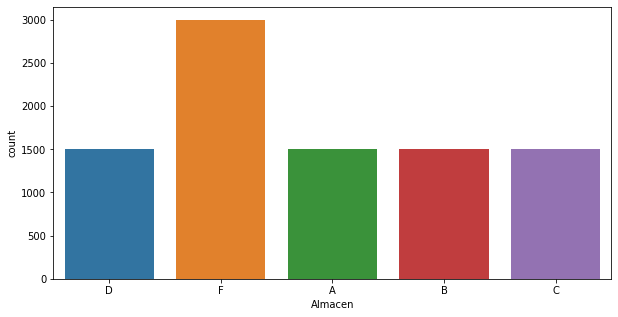

In [19]:
# Generamos un grafico de barras para ver la distribución de la variable Almacen
plt.figure(figsize=(10,5))
sns.countplot(x='Almacen', data=data)
plt.show()

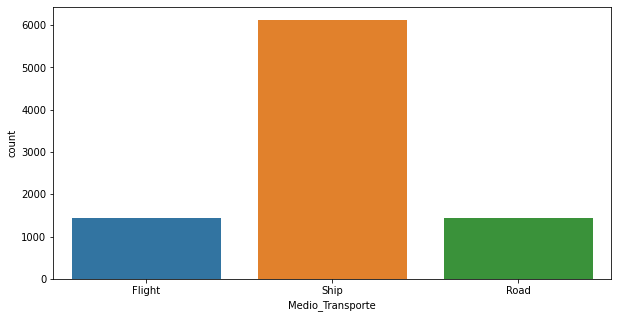

In [20]:
# Generamos un grafico de barras para ver la distribución de la variable Medio_Transporte
plt.figure(figsize=(10,5))
sns.countplot(x='Medio_Transporte', data=data)
plt.show()

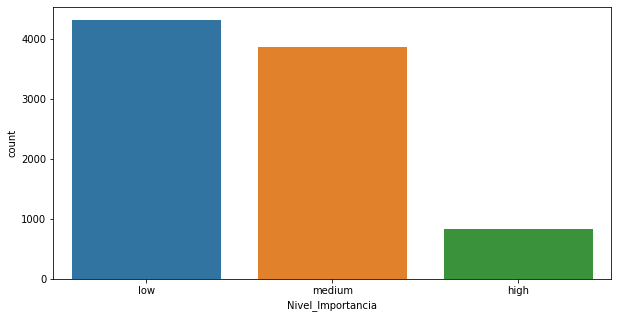

In [21]:
# Generamos un grafico de barras para ver la distribución de la variable Nivel_Importancia
plt.figure(figsize=(10,5))
sns.countplot(x='Nivel_Importancia', data=data)
plt.show()

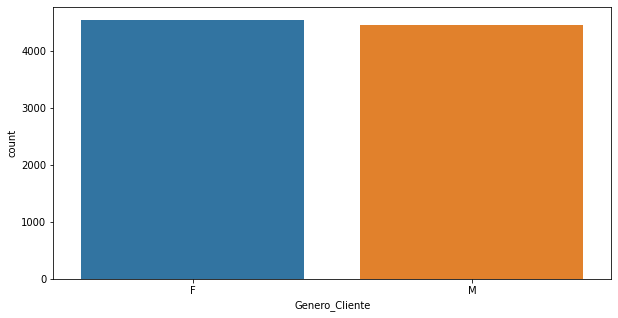

In [22]:
# Generamos un grafico de barras para ver la distribución de la variable Genero_Cliente
plt.figure(figsize=(10,5))
sns.countplot(x='Genero_Cliente', data=data)
plt.show()

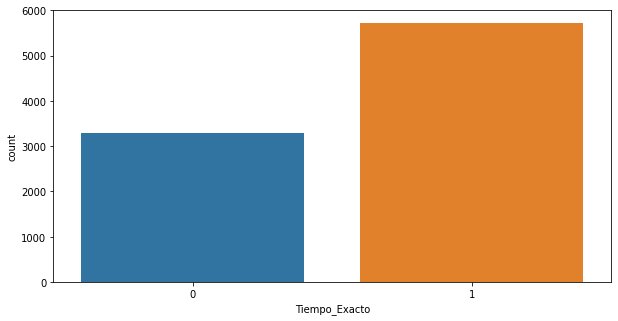

In [23]:
# Generamos un grafico de barras para ver la distribución de la variable Tiempo_Exacto
plt.figure(figsize=(10,5))
sns.countplot(x='Tiempo_Exacto', data=data)
plt.show()

In [24]:
data.Tiempo_Exacto.value_counts()

1    5719
0    3280
Name: Tiempo_Exacto, dtype: int64

## Reesampleamos la data, solo para verificar la distribucion de productos entregados a tiempo en funcion a cada variable.

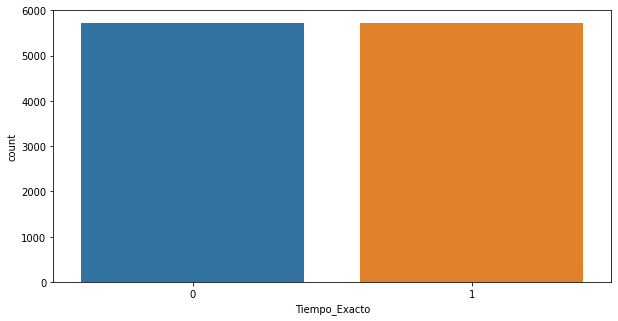

In [25]:
#balanceamos la data en función de la variable Tiempo_Exacto

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X = data.drop('Tiempo_Exacto', axis=1)
y = data.Tiempo_Exacto  
X_resampled, y_resampled = ros.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)

plt.figure(figsize=(10,5))
sns.countplot(x='Tiempo_Exacto', data=df)
plt.show()

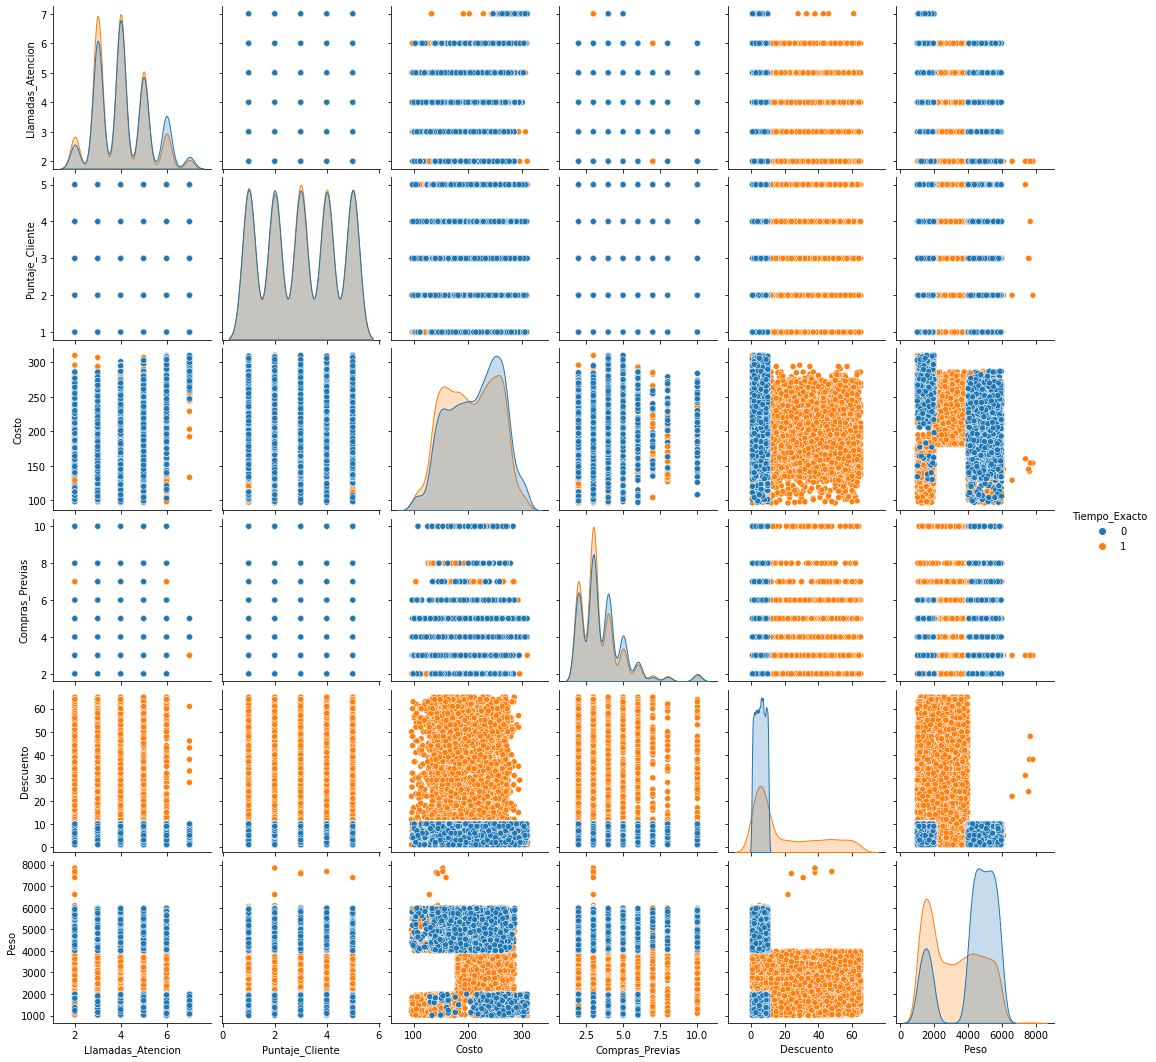

In [26]:
# Hacemos un grafico de dispersion entre las variables
sns.pairplot(df, hue='Tiempo_Exacto')
plt.show()

* Podemos observar que si te dan un descuento mayor al 10% la probabilidad de que sea entregado en tiempo exacto es de 100%
* Si el Peso es mayor a 4000 entonces los descuentos no pueden ser mayores al 10% y hay una alta probabilidad de que no sea entregado en tiempo exacto
* Todos los productos que tienen un peso de 2000 a 4000 tienen una alta probabilidad de ser entregados en tiempo exacto.

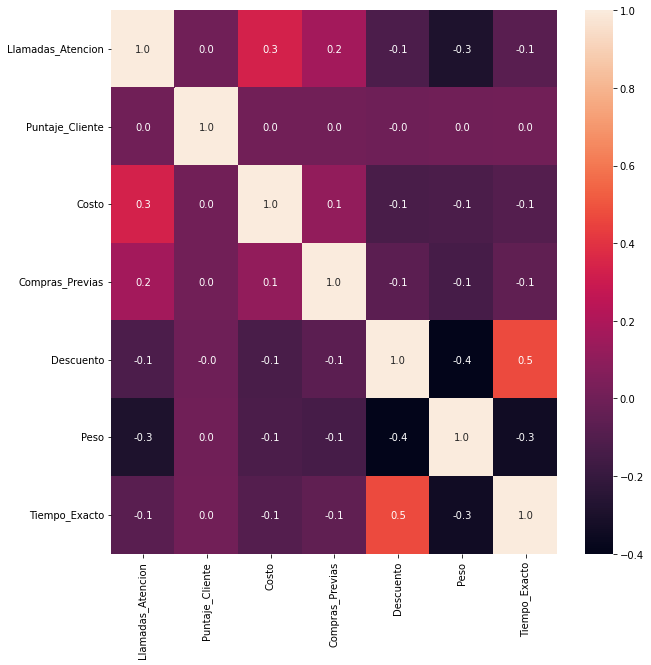

In [27]:
# Mostrar la matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

De las variables numericas, las unicas variables que verdaderamente influyen en la entrega del producto en tiempo exacto son el peso y el descuento, y en menor medida el costo.
Razon por la cual eliminaremos las variables categoricas de llamadas_atencion, puntaje_cliente y compras_previas.

In [28]:
# Eliminando de data las variables que no aportan información

data.drop(['Llamadas_Atencion', 'Puntaje_Cliente', 'Compras_Previas'], axis=1, inplace=True)

## Adaptando los datos categoricos al modelo

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Creamos un objeto OneHotEncoder

codificador1 = OneHotEncoder()
codificacion = codificador1.fit_transform(data[['Almacen']])
col_almacen = pd.DataFrame(codificacion.toarray(), columns=codificador1.categories_)

codificador2 = OneHotEncoder()
codificacion = codificador2.fit_transform(data[['Medio_Transporte']])
col_transporte = pd.DataFrame(codificacion.toarray(), columns=codificador2.categories_)

codificador3 = OneHotEncoder()
codificacion = codificador3.fit_transform(data[['Nivel_Importancia']])
col_importancia = pd.DataFrame(codificacion.toarray(), columns=codificador3.categories_)

codificador4 = OneHotEncoder()
codificacion = codificador4.fit_transform(data[['Genero_Cliente']])
col_genero = pd.DataFrame(codificacion.toarray(), columns=codificador4.categories_)

# Concatenamos las columnas codificadas con la data original
data_categorica = pd.concat([data, col_almacen, col_transporte, col_importancia, col_genero], axis=1)

# Eliminamos las columnas que ya no necesitamos
data_categorica.drop(['Almacen', 'Medio_Transporte', 'Nivel_Importancia', 'Genero_Cliente'], axis=1, inplace=True)

In [30]:
# Exportamos esta data_categorica para analizarla en otro archivo
data_categorica.to_csv('datito/data_categorica.csv', index=False)

Como vemos en el archivo pairplot_data.ipynb las variables categoricas no tienen una relacion directa con la variable objetivo, por lo que eliminaremos estas variables.

In [31]:
# Dejaremos solo las variables que nos interesan para el modelo, es decir, las que no son categóricas

data.drop(['Almacen', 'Medio_Transporte', 'Nivel_Importancia', 'Genero_Cliente'], axis=1, inplace=True)

## Exportamos la data

In [32]:
# Exportar la data 
data.to_csv('datito/data1.csv')